# Transfer Learning (MobileNetV2)

Other Pre-trained model available here: https://keras.io/api/applications/

In [16]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import PIL
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [17]:
# Divides images into directories based on their 'stable_height' from the DataFrame.
def divide_classes(selected_df, train_imdir, output_imdir):
    # Create image output directory if it doesn't exist
    if not os.path.exists(output_imdir):
        os.makedirs(output_imdir)
    
    # Loop through the DataFrame rows
    for index, row in selected_df.iterrows():
        image_id = row['id']
        stable_height = row['stable_height']
        
        # Create a folder based on the stable_height if it doesn't exist
        folder_path = os.path.join(output_imdir, f'{stable_height}')
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        
        # Define the source image path and the destination path
        src_image_path = os.path.join(train_imdir, f'{image_id}.jpg')
        dest_image_path = os.path.join(folder_path, f'{image_id}.jpg')
        
        # Copy the image to the corresponding folder
        if os.path.exists(src_image_path):
            shutil.copy(src_image_path, dest_image_path)
            print(f'Copied {image_id}.jpg to {folder_path}')
        else:
            print(f'{image_id}.jpg not found in {train_imdir}')


In [18]:
# Load the DataFrame
train_df = pd.read_csv('./COMP90086_2024_Project_train/train.csv')

# Specify the image directories
train_imdir = './COMP90086_2024_Project_train/train'
output_imdir = './divided_imgs'

# Select the necessary columns
selected_df = train_df[['id', 'stable_height']]

# Call the function to divide images into folders
# divide_classes(selected_df, train_imdir, output_imdir)

In [19]:
import os
import matplotlib.pyplot as plt

# Plots a bar chart showing the distribution of images in a classification folder (based on stable_height).
def plot_distribution(output_imdir):
    # Dictionary to hold the count of images in each folder
    folder_counts = {}

    # Iterate over the folders in the output directory
    for folder_name in os.listdir(output_imdir):
        folder_path = os.path.join(output_imdir, folder_name)
        
        if os.path.isdir(folder_path):
            # Count the number of images (files) in the folder
            num_images = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
            folder_counts[folder_name] = num_images

    # Sort the folder counts by folder name (i.e., stable_height)
    sorted_folder_counts = dict(sorted(folder_counts.items()))

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_folder_counts.keys(), sorted_folder_counts.values(), color='skyblue')

    # Adding labels and title
    plt.xlabel('Stable Height', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title('Image Distribution by Stable Height', fontsize=14)

    # Annotating each bar with its value (image count)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=10, color='black')
    
    # Show the plot
    plt.tight_layout()
    plt.show()


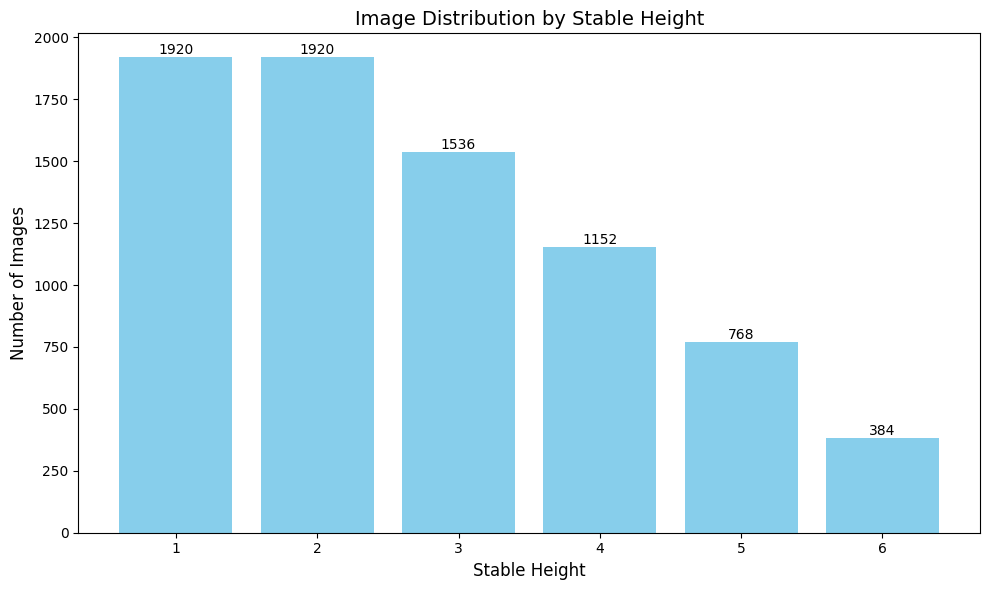

In [5]:
plot_distribution(output_imdir)

### Distribution Analysis 🚀
>Here we can see that the class distribution of our training data is uneven. Bias will most likely occur for dominant classes

In [20]:
# Import directory as readable path for tf
import pathlib
data_dir = pathlib.Path(output_imdir)
print(data_dir)

divided_imgs


[PosixPath('divided_imgs/1/173.jpg'), PosixPath('divided_imgs/1/245.jpg'), PosixPath('divided_imgs/1/611.jpg'), PosixPath('divided_imgs/1/1075.jpg'), PosixPath('divided_imgs/1/2322.jpg'), PosixPath('divided_imgs/1/2670.jpg'), PosixPath('divided_imgs/1/3178.jpg'), PosixPath('divided_imgs/1/3242.jpg'), PosixPath('divided_imgs/1/3247.jpg'), PosixPath('divided_imgs/1/3774.jpg'), PosixPath('divided_imgs/1/4203.jpg'), PosixPath('divided_imgs/1/4384.jpg'), PosixPath('divided_imgs/1/4723.jpg'), PosixPath('divided_imgs/1/5147.jpg'), PosixPath('divided_imgs/1/7168.jpg'), PosixPath('divided_imgs/1/7294.jpg'), PosixPath('divided_imgs/1/7498.jpg'), PosixPath('divided_imgs/1/8673.jpg'), PosixPath('divided_imgs/1/9034.jpg'), PosixPath('divided_imgs/1/9087.jpg'), PosixPath('divided_imgs/1/9218.jpg'), PosixPath('divided_imgs/1/9748.jpg'), PosixPath('divided_imgs/1/10041.jpg'), PosixPath('divided_imgs/1/11030.jpg'), PosixPath('divided_imgs/1/11974.jpg'), PosixPath('divided_imgs/1/13523.jpg'), PosixPath(

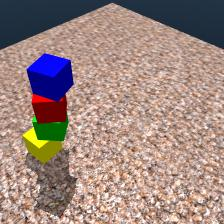

In [21]:
# Show sample in order of file name
stable_1 = list(data_dir.glob('1/*'))
stable_1_sorted = sorted(stable_1, key=lambda x: int(x.stem))
print(stable_1_sorted)
PIL.Image.open(str(stable_1_sorted[0]))

In [22]:
# Set image and preprocessing parameters
img_height,img_width=224,224
batch_size=32
seed = 123
split_ratio = 0.2

In [23]:
# training split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=split_ratio,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7680 files belonging to 6 classes.
Using 6144 files for training.


In [24]:
# validation split
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=split_ratio,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7680 files belonging to 6 classes.
Using 1536 files for validation.


['1', '2', '3', '4', '5', '6']


2024-10-20 03:35:11.840703: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


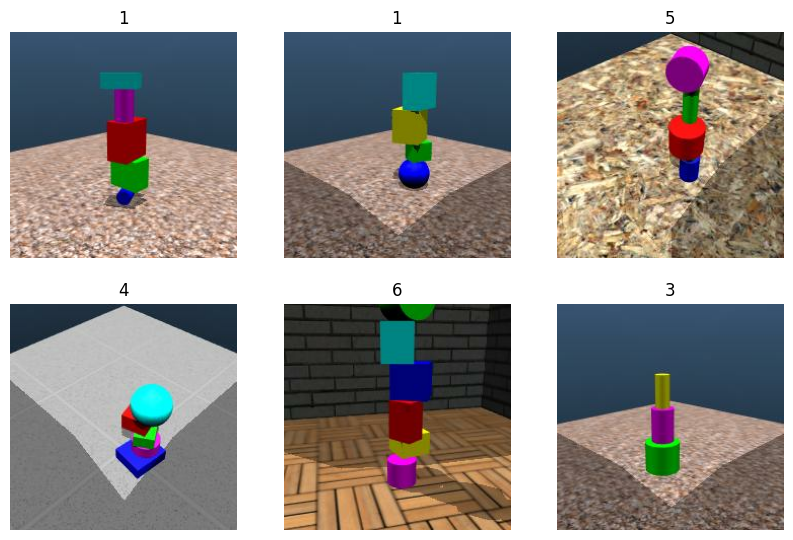

In [25]:
# Display stable_height class names
class_names = train_ds.class_names
print(class_names)

# Display some of the training images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training the model

In [26]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.applications import MobileNetV2

mnv2_model = Sequential()

pretrained_model= MobileNetV2(
    input_shape=(img_height,img_width,3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    pooling='avg',
    classes=6,
    classifier_activation="softmax",
)
for layer in pretrained_model.layers:
        layer.trainable=False

mnv2_model.add(pretrained_model)
mnv2_model.add(Flatten())
mnv2_model.add(Dense(512, activation='relu'))
mnv2_model.add(Dense(6, activation='softmax'))

In [27]:
# Display number of parameters within the model
mnv2_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,916,934 (11.13 MB)

 Trainable params: 658,950 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [34]:
from tensorflow.keras import backend as K

# Custom Precision
def precision(y_true, y_pred):
    y_pred = K.round(y_pred)  # Round predictions to 0 or 1
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_value = true_positives / (predicted_positives + K.epsilon())
    return precision_value

# Custom Recall
def recall(y_true, y_pred):
    y_pred = K.round(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_value = true_positives / (possible_positives + K.epsilon())
    return recall_value

# Custom F1-Score
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1 = 2 * ((p * r) / (p + r + K.epsilon()))
    return f1

In [55]:
# Use Adam optimizer
mnv2_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
epochs=10
history = mnv2_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.2858 - loss: 1.5827 - val_accuracy: 0.2643 - val_loss: 1.6088
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.2903 - loss: 1.5752 - val_accuracy: 0.2448 - val_loss: 1.6106
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 36s 190ms/step - accuracy: 0.3126 - loss: 1.5533 - val_accuracy: 0.2474 - val_loss: 1.6420
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.3230 - loss: 1.5292 - val_accuracy: 0.2526 - val_loss: 1.6459
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.3381 - loss: 1.5084 - val_accuracy: 0.2415 - val_loss: 1.6337
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.3442 - loss: 1.4866 - val_accuracy: 0.2441 - val_loss: 1.6481
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.3548 - loss: 1.4718 - val_accuracy: 0.2650 - val_loss: 1.6463
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.3679 - loss: 1

In [65]:
from sklearn.metrics import classification_report
all_labels = []

# Iterate through the dataset to extract labels
for images, labels in val_ds:
    all_labels.extend(labels.numpy())  # Convert Tensor to NumPy and append to the list


pred = mnv2_model.predict(images, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
# print(np.argmax(labels, axis=1))
print(labels)
print(predicted)
report = classification_report(labels, predicted)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
tf.Tensor([2 0 4 1 0 1 2 1 2 3 3 2 1 4 0 1 0 0 4 4 3 1 1 4 5 1 1 5 0 3 1 4], shape=(32,), dtype=int32)
[1 1 1 0 0 1 0 0 1 1 4 0 1 4 3 1 2 1 3 1 1 1 0 3 1 1 2 1 2 1 2 1]
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.29      0.50      0.37        10
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.50      0.17      0.25         6
           5       0.00      0.00      0.00         2

    accuracy                           0.22        32
   macro avg       0.16      0.14      0.13        32
weighted avg       0.22      0.22      0.19        32



/Users/eunicoc/.pyenv/versions/3.11.5/envs/compvis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eunicoc/.pyenv/versions/3.11.5/envs/compvis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eunicoc/.pyenv/versions/3.11.5/envs/compvis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Predict test set

In [24]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

# Function to predict stable heights for images and save the results in a CSV file.
def output_predictions(model, test_imdir, output_csv, img_size=(224, 224)):
    # Get list of test images
    test_images = os.listdir(test_imdir)

    predictions = []

    # Loop through each image in the test directory
    for img_name in test_images:
        if img_name.endswith('.jpg'):
            # Get the image path
            img_path = os.path.join(test_imdir, img_name)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=img_size)  # adjust size if necessary
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Normalize the image

            # Predict the stable height
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction, axis=1)[0] + 1  # Assuming classes are [1, 2, 3, 4, 5, 6]

            # Append to the list
            predictions.append({'id': img_name.replace('.jpg', ''), 'stable_height': predicted_class})

    # Convert the predictions list to a DataFrame
    predictions_df = pd.DataFrame(predictions)

    # Save the DataFrame to a CSV file
    predictions_df.to_csv(output_csv, index=False)

    print(f'Predictions saved to {output_csv}')


In [25]:
from tensorflow.keras.preprocessing import image

# Load the DataFrame
test_df = pd.read_csv('./COMP90086_2024_Project_test/test.csv')

# Specify the image directories
test_imdir = './COMP90086_2024_Project_test/test'

output_name = 'results.csv'

test_images = os.listdir(test_imdir)

predictions = []

# Example usage:
output_predictions(mnv2_model, test_imdir, output_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━

# Save the model

In [23]:
mnv2_model.save('mnv2_model.h5')